In [17]:
# Importar bibliotecas necesarias
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam

In [34]:
# Rutas a las carpetas de puntos faciales
train_folder = 'puntos-faciales/train'
val_folder = 'puntos-faciales/validation'

# Función para cargar los puntos faciales y etiquetarlos según la carpeta (Estable o Inestable)
def load_data_from_folder(folder):
    data = []
    labels = []
    for class_label in ['estable', 'inestable']:
        class_folder = os.path.join(folder, class_label)
        for file in os.listdir(class_folder):
            if file.endswith('.npy'):
                file_path = os.path.join(class_folder, file)
                points = np.load(file_path)
                data.append(points.flatten())  # Aplanamos los puntos a un vector de 1D
                labels.append(0 if class_label == 'estable' else 1)
    return np.array(data), np.array(labels)
  
# Cargar los datos de entrenamiento y validación
X_train, y_train = load_data_from_folder(train_folder)
X_val, y_val = load_data_from_folder(val_folder)

# Convertir etiquetas a formato categórico (one-hot encoding)
y_train = to_categorical(y_train, num_classes=2)
y_val = to_categorical(y_val, num_classes=2)

# Verificar la clasificación de las etiquetas
print("Etiquetas de entrenamiento (one-hot encoded):")
print(y_train)
print("Etiquetas de validación (one-hot encoded):")
print(y_val)

Etiquetas de entrenamiento (one-hot encoded):
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]
Etiquetas de validación (one-hot encoded):
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [35]:
# Definir el modelo en TensorFlow
model = Sequential([
    Dense(128, activation='relu', input_shape=(478 * 3,)),  # 468 puntos faciales, cada uno con 3 coordenadas (x, y, z)
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')  # 2 clases: Estable o Inestable
])

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/50


e:\Documents\Proyectos_VSCode\DesarrolloWeb\archive\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


885/885 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5915 - loss: 0.6675 - val_accuracy: 0.6423 - val_loss: 0.6108
Epoch 2/50
885/885 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7142 - loss: 0.5491 - val_accuracy: 0.6975 - val_loss: 0.5564
Epoch 3/50
885/885 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7406 - loss: 0.5204 - val_accuracy: 0.6886 - val_loss: 0.5938
Epoch 4/50
885/885 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7531 - loss: 0.5072 - val_accuracy: 0.7135 - val_loss: 0.5493
Epoch 5/50
885/885 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7612 - loss: 0.4909 - val_accuracy: 0.7046 - val_loss: 0.5739
Epoch 6/50
885/885 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7778 - loss: 0.4813 - val_accuracy: 0.7580 - val_loss: 0.5417
Epoch 7/50
885/885 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7788 - loss: 0.4693 - val_accuracy: 0.6512 - val_loss: 0.7415
Epoch 8/50
885/885 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7796 - loss: 0.4701 - val_accuracy: 0.7260 - val_

In [36]:
# Evaluar el modelo
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Accuracy en validación: {val_accuracy:.2f}')

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8726 - loss: 0.2809 
Accuracy en validación: 0.78


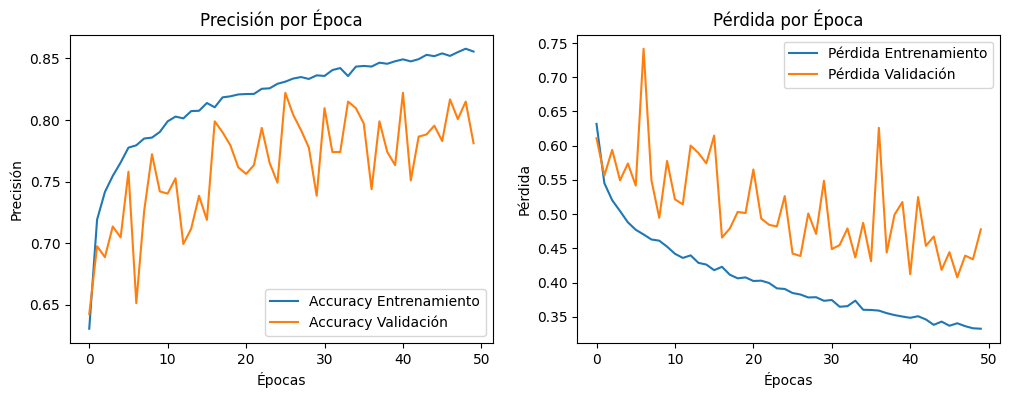

In [37]:
import matplotlib.pyplot as plt

# Graficar precisión
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Accuracy Validación')
plt.title('Precisión por Época')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Graficar pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida Validación')
plt.title('Pérdida por Época')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

In [38]:
# Guardado del modelo
model.save('Modelos/model_estable_inestable_478_landmarks.h5')

In [39]:
# Conversión del modelo a formato tflite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\paule\AppData\Local\Temp\tmpc_7nh7xe\assets


INFO:tensorflow:Assets written to: C:\Users\paule\AppData\Local\Temp\tmpc_7nh7xe\assets


Saved artifact at 'C:\Users\paule\AppData\Local\Temp\tmpc_7nh7xe'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1434), dtype=tf.float32, name='keras_tensor_93')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  1902475727056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1902475731088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1902475727440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1902475733200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1902475733392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1902475728976: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [40]:
# Guardado del modelo tflite
with open('Modelos/model_estable_inestable_478_landmarks.tflite', 'wb') as f:
    f.write(tflite_model)